In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [6]:
fifafile= pd.read_csv("C:/Users/gorka/Desktop/Data Analitycs/Ironhack/Unit 2./fifa21_train.csv")
display (fifafile)
fifafile.shape
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,Left,5,"Feb 8, 2018",NaN,€625K,€3K,€891K,2018 ~ 2021,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,3 ★,2★,Medium

In [7]:
# I define the "max rows" to use it only once, because it was giving me problems with so many rows
def print_full(df):
    import pandas as pd
    pd.set_option('display.max_rows', len(df))
    print(df)
    pd.reset_option('display.max_rows')

In [8]:
# I find this OVA calculator: https://sofifa.com/calculator?r=210056&set=true. So columns that I maintain are "Name" and "BP" to use them as a filter. Moreover, I keep the columns that shows the link. 
fifafile =fifafile.drop(['Club','Joined','Loan Date End','A/W','D/W','ID','Age','Position','Nationality','Team & Contract','Height','Weight','foot','Growth','Value','Wage','Release Clause','Contract','Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping','Total Stats','Base Stats', "W/F", 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK',"SM"], axis=1)


In [9]:
print_full(fifafile.isna().sum())


Name                  0
BP                    0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys              41
Dribbling             0
Curve                41
FK Accuracy           0
Long Passing          0
Ball Control          0
Acceleration          0
Sprint Speed          0
Agility              41
Reactions             0
Balance              41
Shot Power            0
Jumping              41
Stamina               0
Strength              0
Long Shots            0
Aggression            0
Interceptions         7
Positioning           7
Vision               41
Penalties             0
Composure           279
Marking               0
Standing Tackle       0
Sliding Tackle       41
GK Diving             0
GK Handling           0
GK Kicking            0
GK Positioning        0
GK Reflexes           0
IR                    0
PAC                   0
SHO                   0
PAS                   0
DRI                   0
DEF             

In [10]:
fifafile[fifafile.isna().any(axis=1)]

,Name,BP,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
17,M. Oddo B,CM,85,56,60,80,61.0,74,85.0,82,80,76,54,54,66.0,74,64.0,78,58.0,52,66,74,60,68.0,70.0,62.0,88,NaN,70,75,75.0,7,5,13,12,15,3 ★,54,67,78,73,71,61,71
32,L. Muñoz,CB,27,21,53,50,NaN,41,NaN,32,35,46,65,61,NaN,62,NaN,27,NaN,50,53,21,69,42.0,39.0,NaN,40,NaN,61,64,NaN,5,21,35,21,21,1 ★,63,24,39,46,58,55,60
44,C. Reyna,CM,60,62,66,83,NaN,66,NaN,74,74,79,65,64,NaN,60,NaN,73,NaN,80,72,69,69,81.0,70.0,NaN,78,NaN,71,68,NaN,8,21,74,21,21,2 ★,64,67,74,70,71,74,76
369,Ricardo Bueno,ST,57,61,74,54,57.0,67,59.0,53,51,66,72,72,67.0,65,66.0,65,84.0,49,59,61,49,37.0,69.0,57.0,51,NaN,20,29,24.0,15,8,14,8,15,1 ★,72,62,55,67,32,56,65
396,Diego,CAM,81,66,53,83,80.0,84,85.0,85,82,83,75,74,81.0,71,84.0,74,75.0,65,61,75,61,34.0,70.0,80.0,84,NaN,26,36,34.0,6,6,5,14,14,3 ★,74,71,82,83,34,63,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11555,Rodrigão,ST,52,73,82,48,NaN,63,NaN,42,35,68,72,72,NaN,66,NaN,74,NaN,72,76,67,67,57.0,78.0,NaN,55,NaN,25,37,NaN,11,20,35,20,20,3 ★,72,71,45,65,42,73,70
11580,Nenê,LW,77,75,66,80,75.0,79,82.0,81,76,78,67,69,77.0,71,74.0,72,62.0,58,65,78,65,35.0,74.0,77.0,84,NaN,25,25,25.0,12,7,13,8,8,1 ★,68,75,78,78,31,63,76
11650,J. Koller,ST,57,84,86,75,NaN,56,NaN,42,43,79,60,67,NaN,81,NaN,87,NaN,68,94,75,69,72.0,85.0,NaN,76,NaN,23,42,NaN,38,41,43,41,39,3 ★,64,82,59,68,47,81,78
11680,P. Guerrero,ST,67,78,83,72,76.0,78,65.0,31,63,83,66,69,63.0,72,65.0,77,80.0,51,84,66,70,35.0,78.0,70.0,77,NaN,25,21,25.0,10,13,6,10,9,3 ★,68,75,67,77,32,73,78


In [11]:
# I find that columns with 41 NaN values are for players of players who are new and probably do not have complete information about them.
fifafile_nan = pd.DataFrame(fifafile,columns=['Volleys','Curve',"Jumping","Balance", "Agility","Vision","Sliding Tackle" , "Interceptions"])

nan_values = fifafile_nan[fifafile_nan.isnull().any(axis=1)]

display (nan_values)

,Volleys,Curve,Jumping,Balance,Agility,Vision,Sliding Tackle,Interceptions
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0
470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0
928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0
1778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0


In [12]:
fifafile = fifafile[fifafile['Volleys'].isna()==False]

In [13]:
# In this case I decided to complete them with the mean. 
mean_composure = fifafile["Composure"].mean()
fifafile["Composure"] =fifafile["Composure"].fillna(mean_composure)

In [14]:
print_full(fifafile.isna().sum())

Name                0
BP                  0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Composure           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Positioning      0
GK Reflexes         0
IR                  0
PAC                 0
SHO                 0
PAS                 0
DRI                 0
DEF                 0
PHY                 0
OVA                 0
dtype: int64


In [15]:
fifafile.head()

,Name,BP,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,A. Pasche,CM,54,47,43,70,44.0,61,44.0,55,63,63,64,73,61.0,66,82.0,62,73.0,71,55,45,54,52.0,62.0,68.0,54,54.0,49,56,43.0,7,12,14,9,6,1 ★,69,51,63,63,51,60,64
1,Alan Carvalho,ST,66,79,76,68,76.0,83,78.0,72,63,79,83,83,88.0,75,75.0,74,81.0,75,74,68,54,33.0,78.0,72.0,76,70.0,35,20,22.0,11,7,14,7,16,2 ★,83,75,68,82,33,71,77
2,S. Giovinco,CAM,73,76,34,78,75.0,85,89.0,91,74,85,84,76,93.0,78,93.0,79,34.0,75,42,78,75,26.0,80.0,78.0,73,82.0,23,29,28.0,6,3,6,3,3,2 ★,80,77,78,86,27,56,80
3,J. Evans,CDM,44,42,58,62,36.0,54,41.0,46,57,61,54,59,59.0,55,55.0,57,60.0,64,58,38,61,57.0,31.0,54.0,54,48.0,55,58,55.0,8,9,6,7,12,1 ★,57,44,54,57,57,60,59
4,Y. Demoncy,CDM,49,37,61,68,34.0,64,44.0,45,61,66,66,66,61.0,62,69.0,61,34.0,81,61,43,66,60.0,55.0,64.0,49,58.0,58,61,66.0,8,9,15,5,15,1 ★,66,44,60,64,60,66,65


In [16]:
fifafile['IR']=fifafile['IR'].str.replace('★','') #This for replace the star with nothing
fifafile['IR'] = pd.to_numeric(fifafile['IR'],errors='coerce') # It was string so I convert to numerical


In [17]:
numerical = fifafile.select_dtypes(include = np.number)
categorical = fifafile.select_dtypes(include = object)

In [18]:
numerical.columns

Index(['Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'OVA'],
      dtype='object')

In [19]:
categorical.columns

Index(['Name', 'BP'], dtype='object')

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


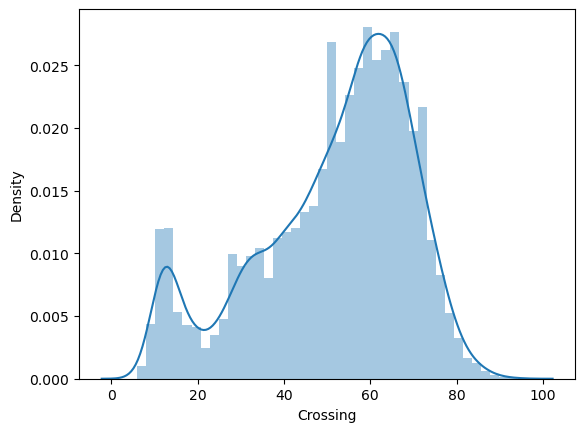

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


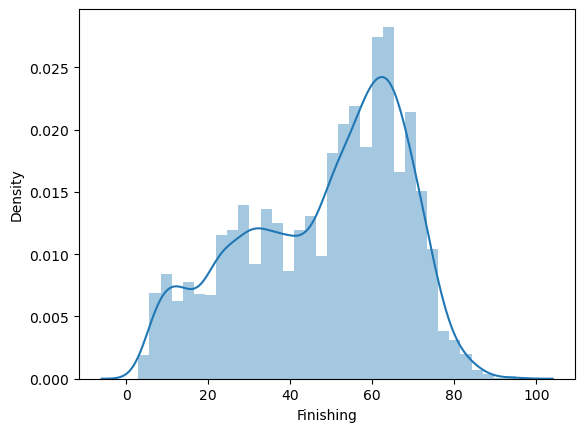

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


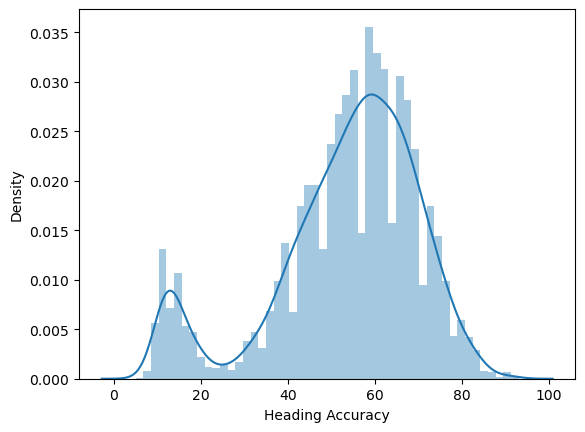

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


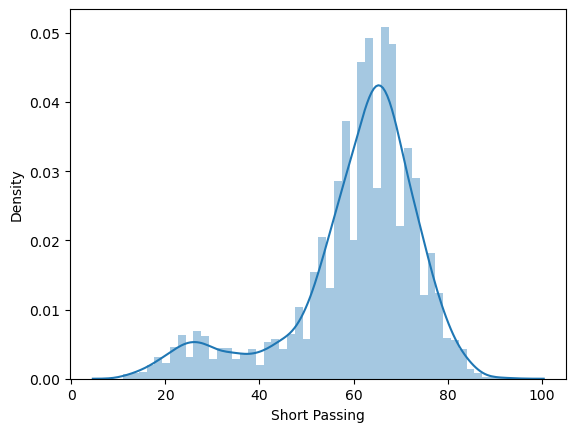

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


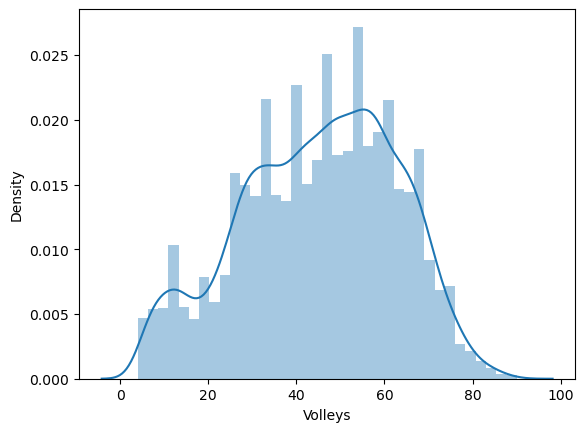

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


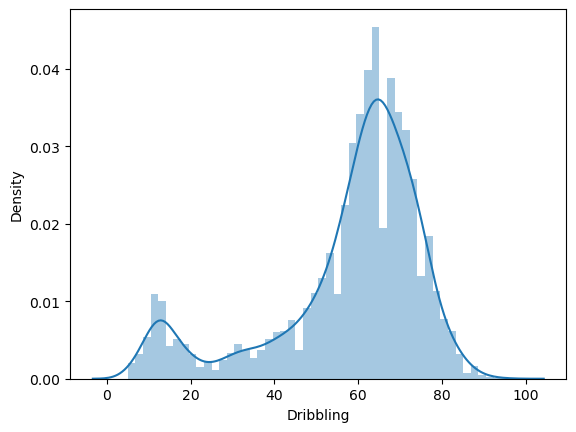

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


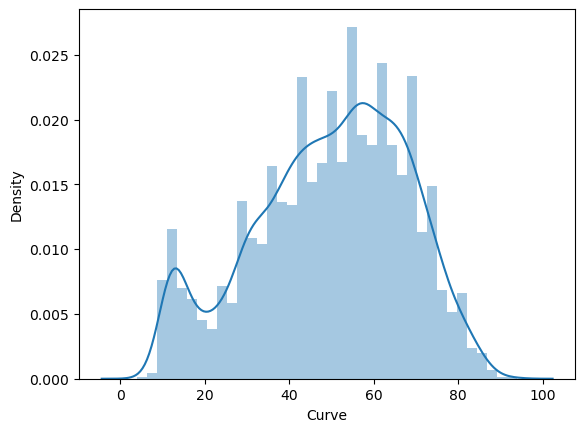

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


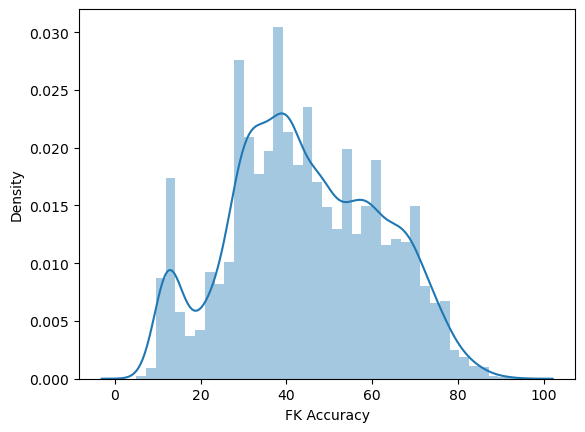

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


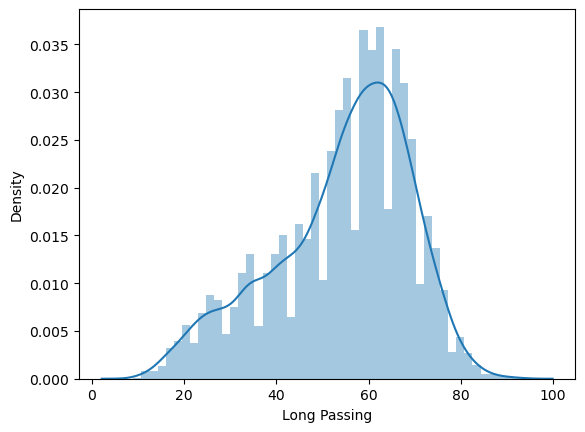

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


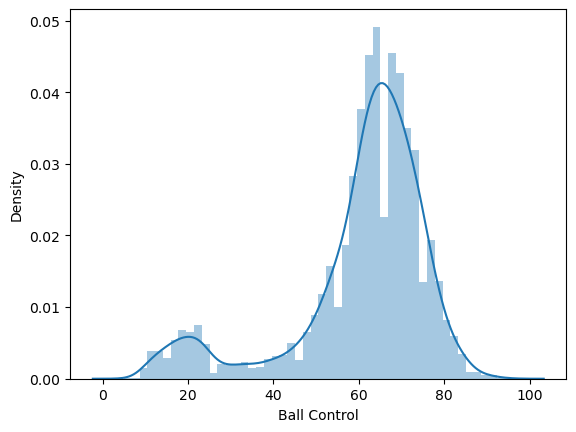

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


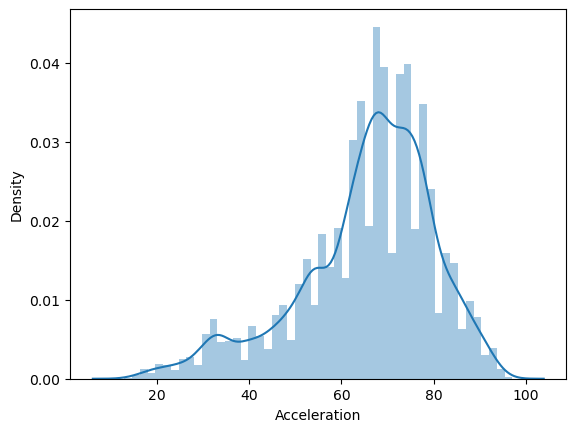

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


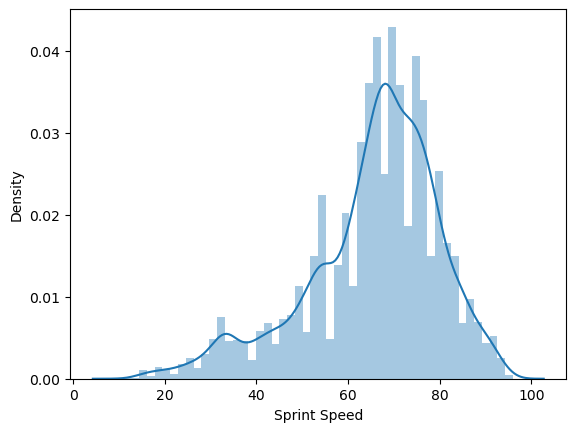

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


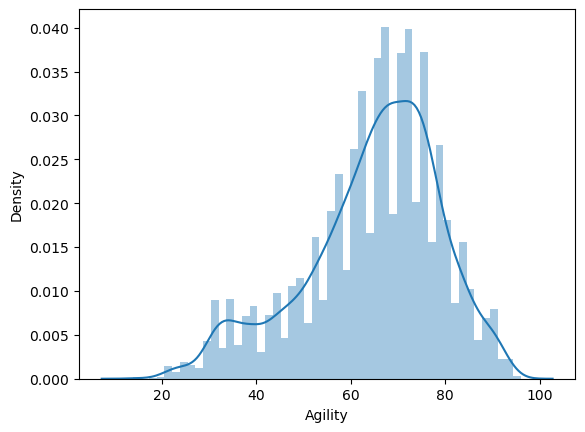

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


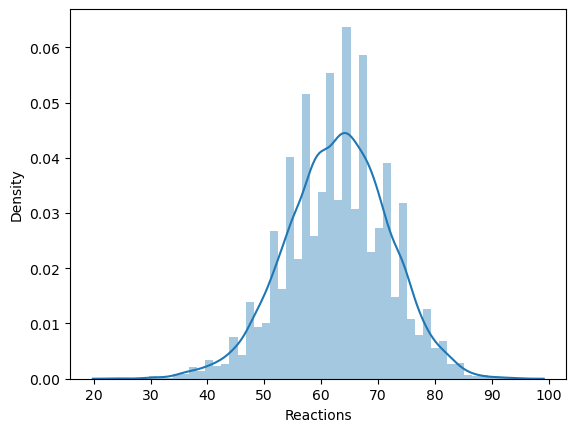

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


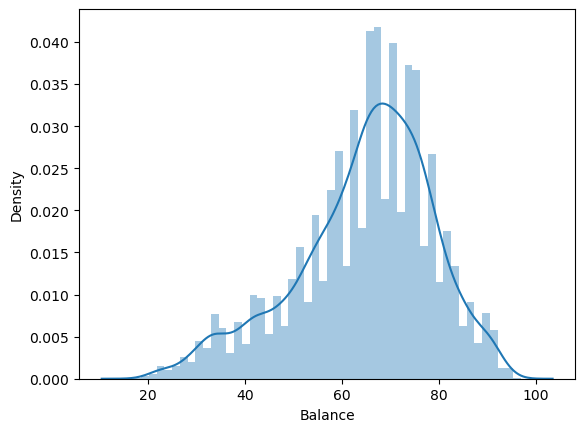

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


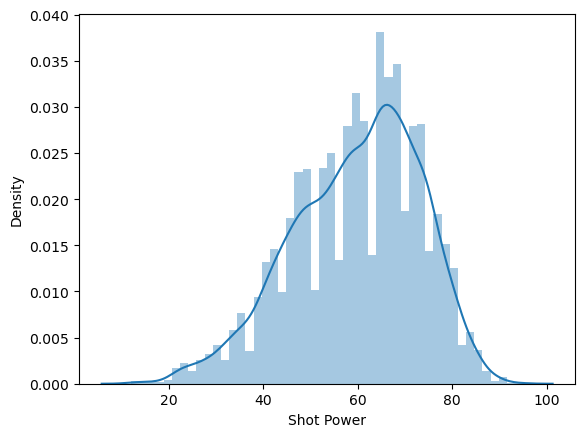

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


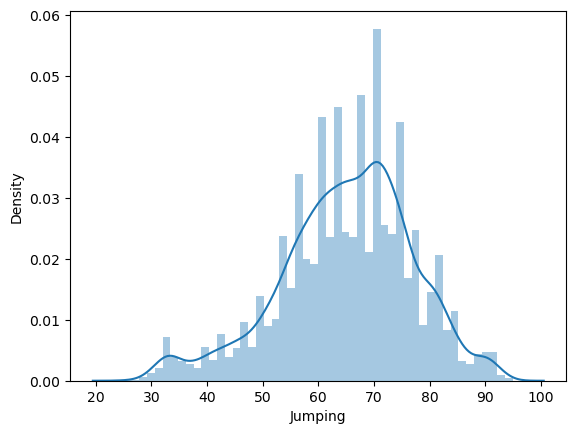

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


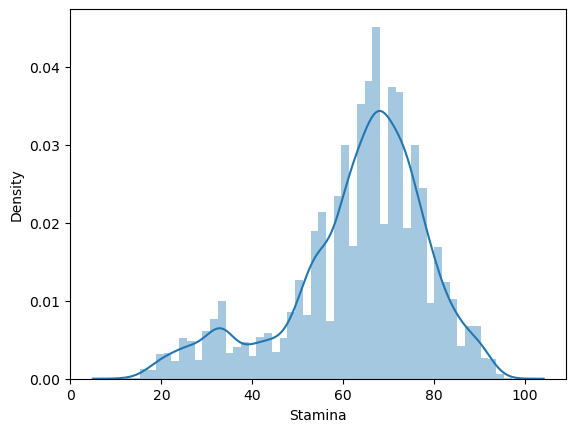

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


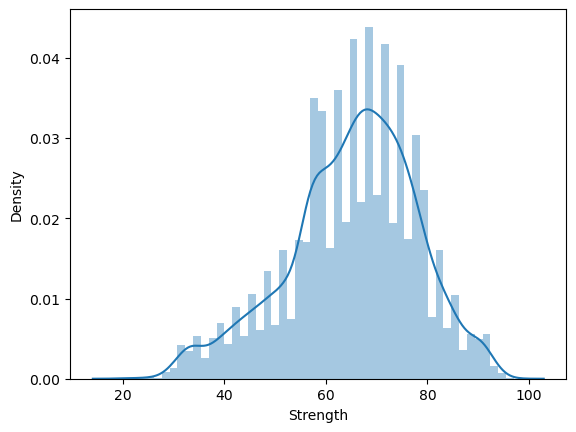

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


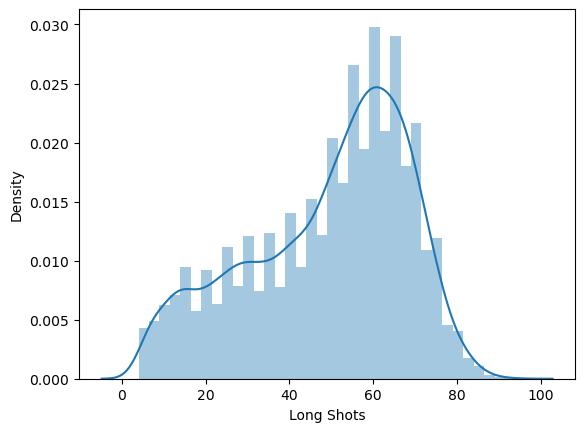

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


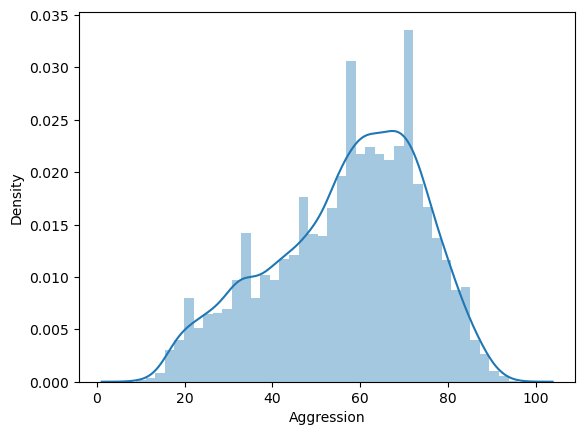

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


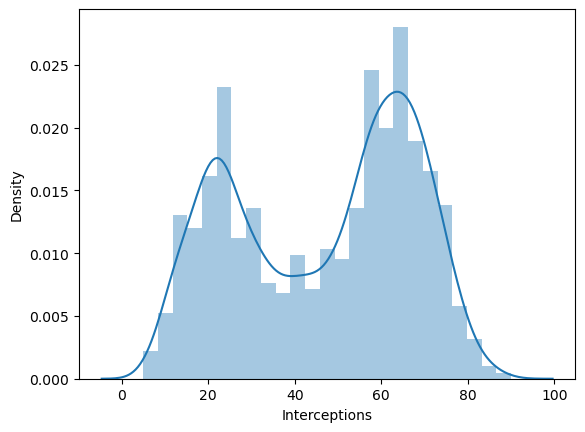

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


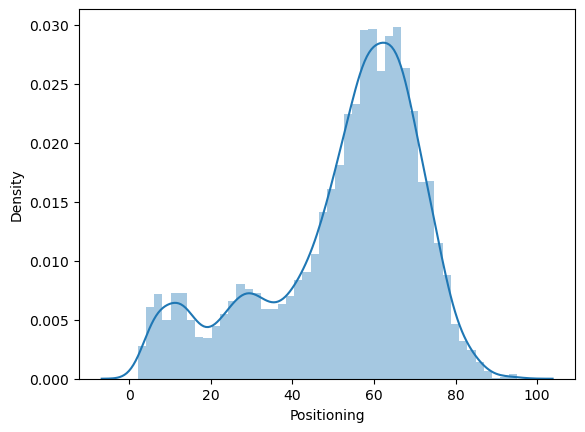

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


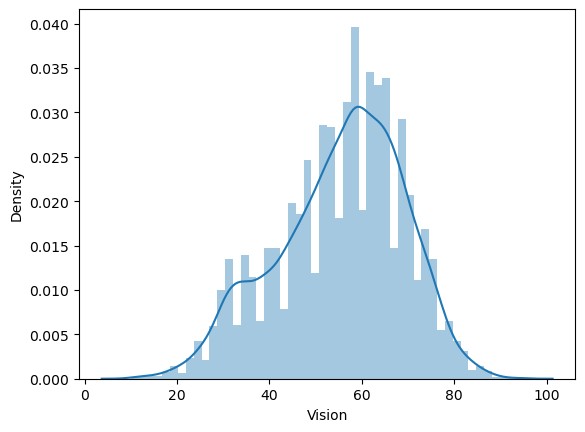

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


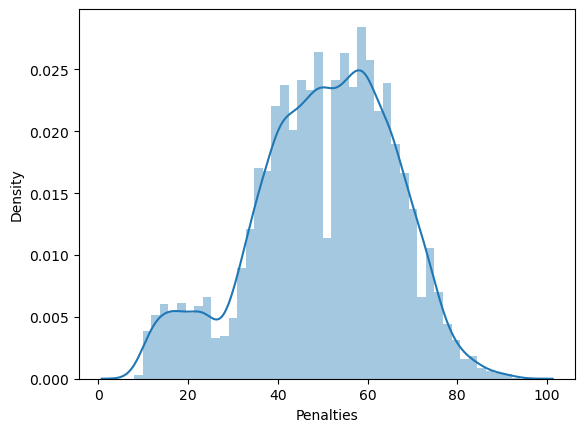

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


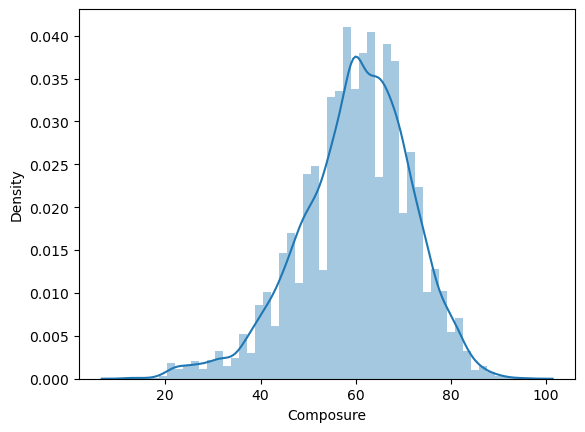

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


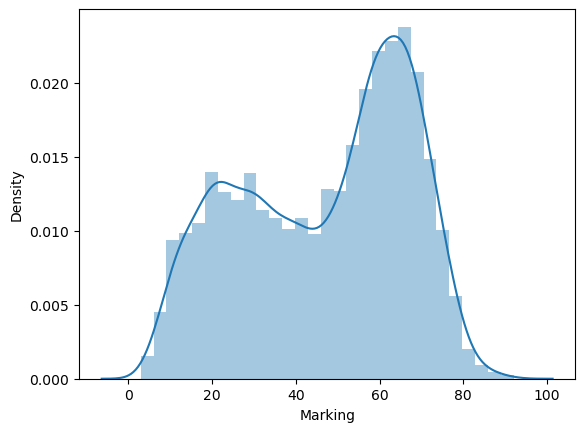

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


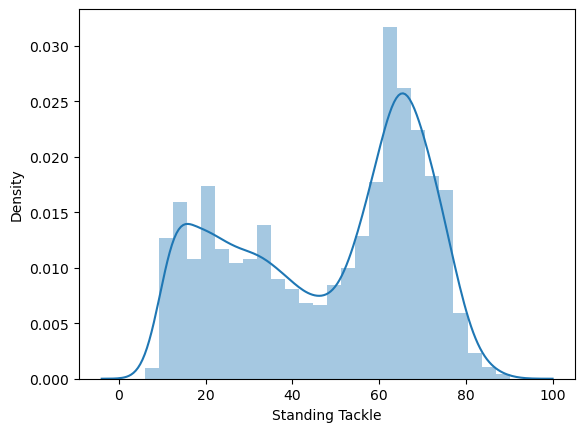

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


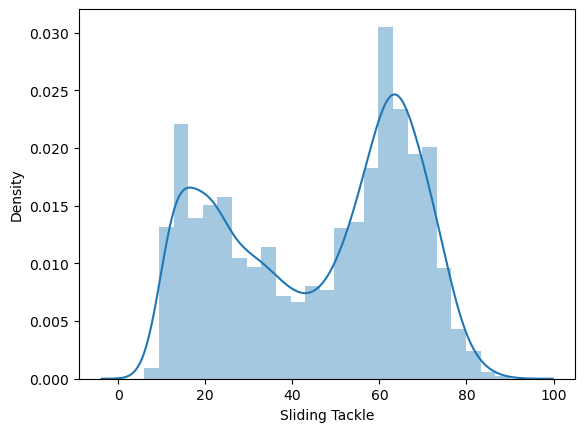

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


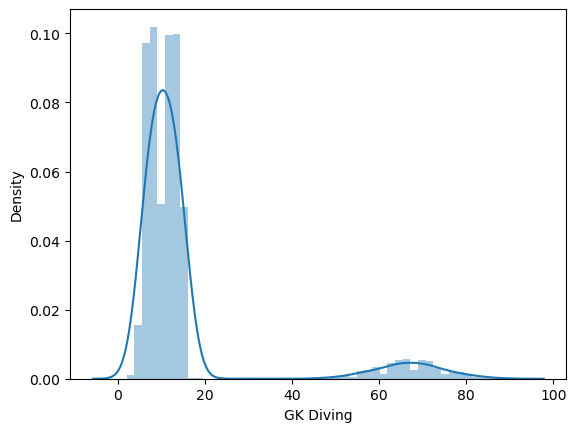

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


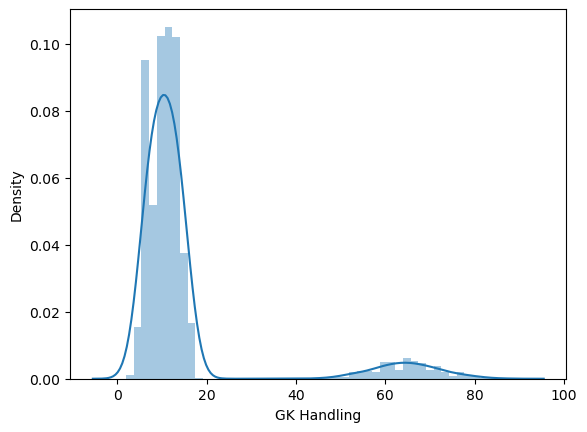

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


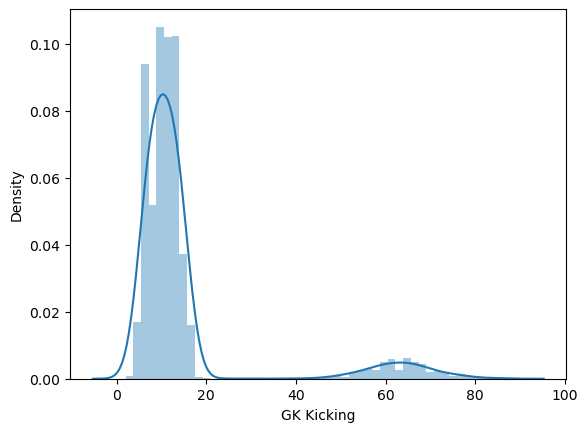

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


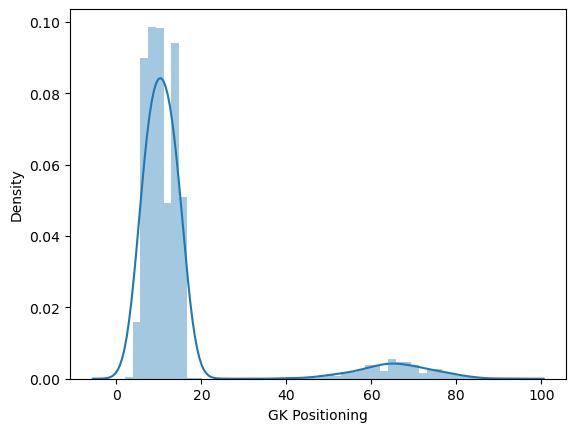

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


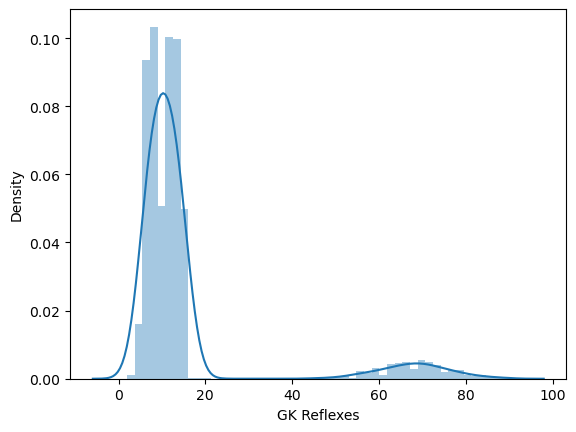

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


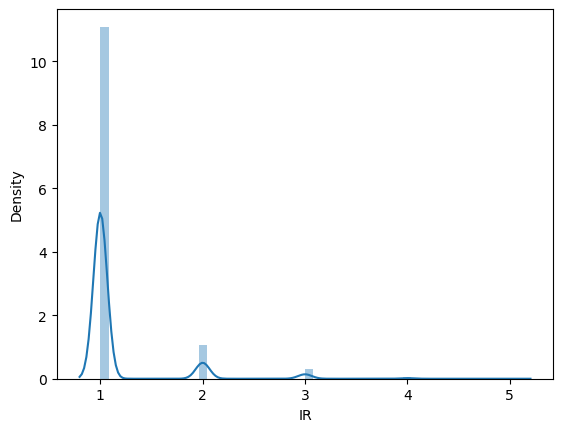

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


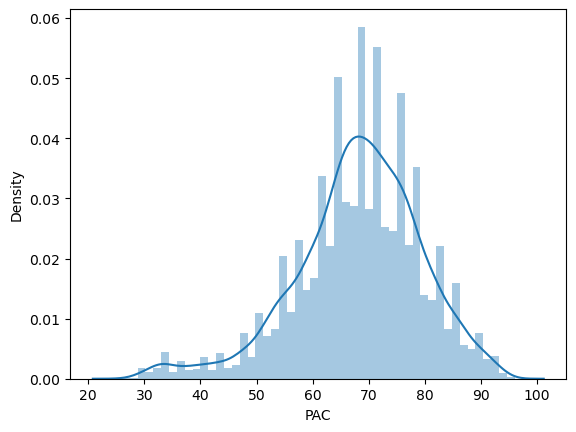

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


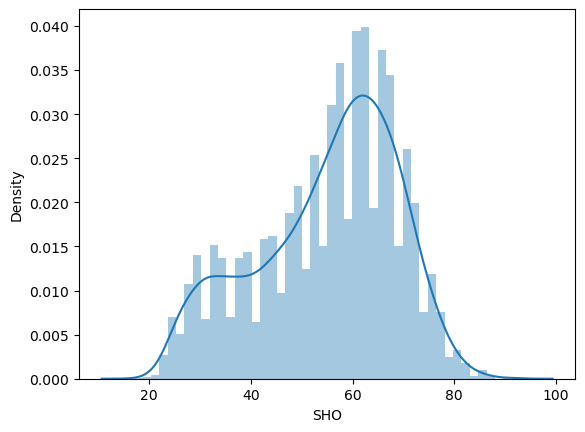

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


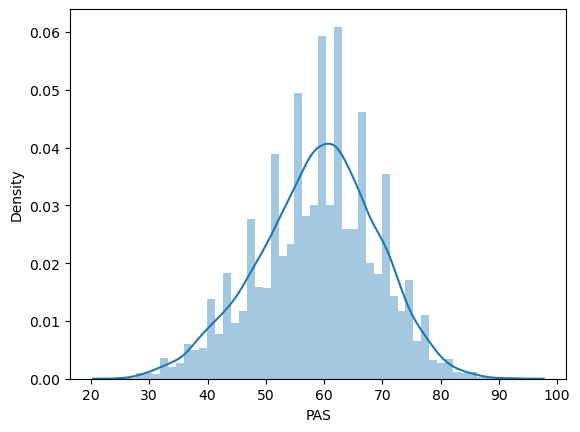

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


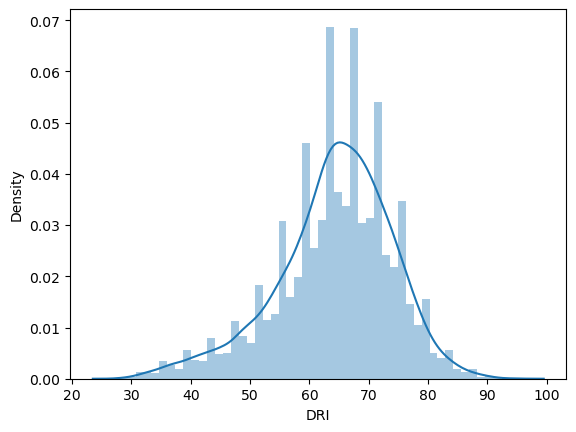

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


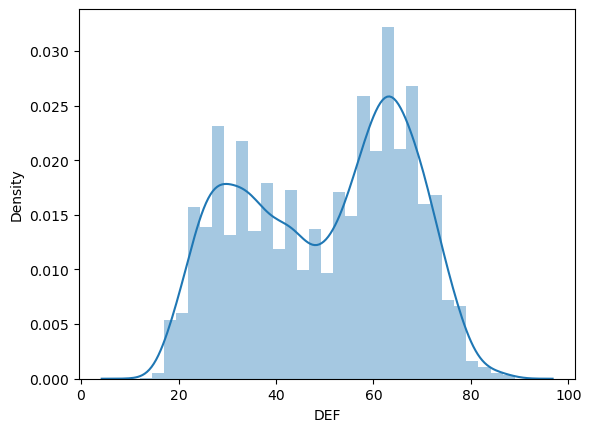

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


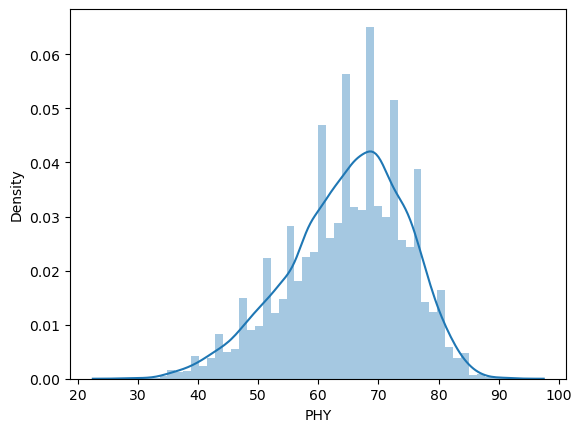

C:\Users\gorka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


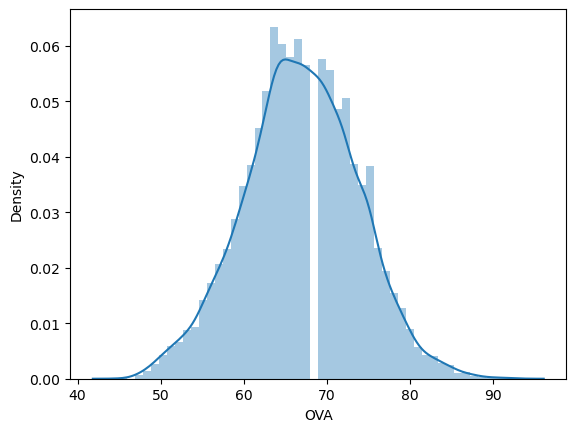

In [20]:
# Mos of them have normal distribution except those related to GK. I will try to do later a model without this one´s.
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

In [21]:
# X and y split
y = numerical['OVA']
X = numerical.drop(['OVA'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = categorical

In [22]:
# Normalization. In this case I don´t encode categorical because we maintain them for filtering.
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)

(11660, 41)


In [23]:
X_cat.shape

(11660, 2)

In [24]:
y.head()

0    64
1    77
2    80
3    59
4    65
Name: OVA, dtype: int64

In [25]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9328, 41)
(2332, 41)
(9328,)
(2332,)


In [27]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train) # model training
y_pred_linreg=lm.predict(X_test) # model prediction

In [28]:
# Validation R2 scores
predictions = lm.predict(X_train)
r2_score_train = r2_score(y_train, predictions)
predictions_test = lm.predict(X_test)
r2_score_test = r2_score(y_test, predictions_test)
print ('train R2: {} -- test R2: {}'.format(r2_score_train,r2_score_test))

train R2: 0.8934080637992131 -- test R2: 0.8986275062076414


In [29]:
# Mean Squared Error
train_mse=mean_squared_error(y_train,predictions)
test_mse=mean_squared_error(y_test,predictions_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 5.023993125684909 -- test MSE: 4.676704778252129


In [30]:
# Root Mean Squared Error
rmse_train = np.sqrt(mean_squared_error(y_train,predictions))
rmse_test = np.sqrt(mean_squared_error(y_test,predictions_test))
print ('train RMSE: {} -- test RMSE: {}'.format(rmse_train, rmse_test))

train RMSE: 2.241426582711312 -- test RMSE: 2.162569022771789


In [31]:
# Mean Absolute Error
mae_train = mean_absolute_error(y_train, predictions)
mae_test = mean_absolute_error(y_test, predictions_test)
print ('train MAE: {} -- test MAE: {}'.format(mae_train,mae_test))

train MAE: 1.753626064951629 -- test MAE: 1.7028787784298771


In [32]:
y_test[:5]

4600    67
8805    60
3355    76
5216    63
2829    57
Name: OVA, dtype: int64

In [33]:
predictions_test[:5]

array([68.76721563, 63.49423239, 76.28368408, 65.30823391, 56.79955128])

In [34]:
# I am going to try another model without the GK one´s because the have multicolinearity
X1 = numerical.drop(['OVA','GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes',], axis=1)
X1_num = X1.select_dtypes(include = np.number)

In [35]:
transformer1 = MinMaxScaler().fit(X1_num)
x1_normalized = transformer1.transform(X1_num)
print(x1_normalized.shape)
x1_normalized = pd.DataFrame(x1_normalized, columns=X1_num.columns)

(11660, 36)


In [36]:
# Test train split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)

In [37]:
lm = linear_model.LinearRegression()
lm.fit(X1_train,y_train) # model training
y_pred_linreg=lm.predict(X1_test) # model prediction

In [38]:
# Validation R2 scores
predictions1 = lm.predict(X1_train)
r2_score_train1 = r2_score(y_train, predictions1)
predictions_test1 = lm.predict(X1_test)
r2_score_test1 = r2_score(y_test, predictions_test1)
print ('train R2: {} -- test R2: {}'.format(r2_score_train1,r2_score_test1))

train R2: 0.8949124854050088 -- test R2: 0.8920511968176519


In [39]:
# Mean Squared Error
train_mse1=mean_squared_error(y_train,predictions1)
test_mse1=mean_squared_error(y_test,predictions_test1)

print ('train MSE: {} -- test MSE: {}'.format(train_mse1, test_mse1))

train MSE: 4.897360048429994 -- test MSE: 5.211734636984105


In [40]:
# Root Mean Squared Error
rmse_train1 = np.sqrt(mean_squared_error(y_train,predictions1))
rmse_test1 = np.sqrt(mean_squared_error(y_test,predictions_test1))
print ('train RMSE: {} -- test RMSE: {}'.format(rmse_train1, rmse_test1))

train RMSE: 2.2129979775024635 -- test RMSE: 2.2829223896103223


In [41]:
# Mean Absolute Error
mae_train1 = mean_absolute_error(y_train, predictions1)
mae_test1 = mean_absolute_error(y_test, predictions_test1)
print ('train MAE: {} -- test MAE: {}'.format(mae_train1,mae_test1))

train MAE: 1.7355121517453884 -- test MAE: 1.7770922232094777


In [42]:
# I find it so similar to the other model, so we are going to keep this variables.